In [3]:
# tweakreg defaults: 
# threshold = 4
# conv_width = 3.5
# use round = No --> roundlo = -1, roundhi = 1
# peakmin = //
# peakmax = //

In [1]:
import sys
sys.path.append("/Users/natalie/PycharmProjects/code/")
    
from Drizzle_func import *
import pandas
import matplotlib.pyplot as plt

The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol


In [11]:
import drizzlepac
from drizzlepac import tweakreg
import os
from astropy import table
import fnmatch

def tweak_loop(path, n_up, threshold_ini, threshold_gap, conv_width_ini, conv_width_gap, roundlo_val_ini, roundlo_gap, roundhi_val_ini, roundhi_gap, peakmax_val_ini, peakmax_gap):
    
    os.chdir(path)
    shift_file = []
    file_name = []
    x_rms = []
    y_rms = []
    threshold = []
    conv_width = []
    roundlo = []
    roundhi = []
    peakmax = []

    for m in range(1, n_up, 1):                             # threshold val loop
        threshold_val = threshold_ini+(m-1)*threshold_gap
        for l in range(1, n_up, 1):                         # conv_width val loop
            conv_width_val = conv_width_ini+(l-1)*conv_width_gap
            for k in range(1, n_up, 1):                     # roundlo val loop
                roundlo_val = roundlo_val_ini+(k-1)*roundlo_gap
                for r in range(1, n_up, 1):                 # roundhi val loop
                    roundhi_val = roundhi_val_ini+(r-1)*roundhi_gap
                    for p in range(1, n_up, 1):             # peakmax val loop
                        peakmax_val = peakmax_val_ini+(p-1)*peakmax_gap
                        outshifts_val = (repr(m)+repr(l)+repr(k)+repr(r)+repr(p)+'_shift.txt') # shift file name
                        tweakreg.TweakReg('*c0m.fits', exclusions='WFPC2_exclude.txt', updatehdr=False, shiftfile=True, outshifts=outshifts_val, residplot='No plot', see2dplot=None, use_sharp_round='Yes', threshold=threshold_val, conv_width=conv_width_val, roundlo=roundlo_val, roundhi=roundhi_val, peakmax=peakmax_val)

                        shift = open(outshifts_val,"r")     # open the shift file and read parameters
                        list = []
                        for line in shift:
                            list.append(line)
                        shift.close()

                        for d in range(4, len(list), 1):    # per image in stack, split the aligment parameters
                            words = list[d].split()

                            if fnmatch.fnmatch(words[1],'*n*'):     # if Nan - mark failed
                                shift_file.append(outshifts_val)
                                file_name.append(words[0])
                                x_rms.append('failed')
                                y_rms.append('failed')
                                threshold.append(threshold_val)
                                conv_width.append(conv_width_val)
                                roundlo.append(roundlo_val)
                                roundhi.append(roundhi_val)
                                peakmax.append(peakmax_val)

                            else:                                   # if succeeded - save parameters
                                shift_file.append(outshifts_val)
                                file_name.append(words[0])
                                x_rms.append(words[5])
                                y_rms.append(words[6])
                                threshold.append(threshold_val)
                                conv_width.append(conv_width_val)
                                roundlo.append(roundlo_val)
                                roundhi.append(roundhi_val)
                                peakmax.append(peakmax_val)

    results = table.Table([shift_file, file_name, x_rms, y_rms, threshold, conv_width, roundlo, roundhi, peakmax], names=['shift', 'file', 'x_rms', 'y_rms', 'threshold', 'conv_width', 'roundlo', 'roundhi', 'peakmax'])

    return results

In [16]:
# tweak_run(path, n_up, threshold_ini, threshold_gap, conv_width_ini, conv_width_gap, 
# roundlo_val_ini, roundlo_gap, roundhi_val_ini, roundhi_gap, peakmax_val_ini, peakmax_gap):
test = tweak_loop('/Users/natalie/anaconda2/envs/iraf27/iraf/sn/2000ds/2000ds_pre/test',3,5,1,3.5,0.1,-1,0.1,1,0.1,1000,500)

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 16:34:55.812 (24/12/2017)

Version Information

--------------------

Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 16:34:56.107 (24/12/2017)

     Found 966 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 16:34:56.501 (24/12/2017)

     Found 1004 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 16:34:56.974 (24/12/2017)

     Found 1048 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EX

[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 16:35:12.520 (24/12/2017)

     Found 1005 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 16:35:13.062 (24/12/2017)

     Found 1036 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 16:35:13.824 (24/12/2017)

     Found 1075 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 16:35:14.522 (24/12/2017)

     Found 1052 objects.

===  Found a TOTAL of 4168 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0


u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 16:35:29.140 (24/12/2017)

     Found 966 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 16:35:29.53 (24/12/2017)

     Found 1002 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 16:35:30.03 (24/12/2017)

     Found 1043 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 16:35:30.61 (24/12/2017)

     Found 1031 objects.

===  Found a TOTAL of 4042 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 1) started at: 16:35:31.289 (24/12/2017)

     Found 832 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 2) started at: 16:35:31.646 (24/12/2017)

     Foun


     Found 309 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 16:35:43.137 (24/12/2017)

     Found 398 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 16:35:43.659 (24/12/2017)

     Found 422 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 16:35:44.209 (24/12/2017)

     Found 434 objects.

===  Found a TOTAL of 1563 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 1) started at: 16:35:44.890 (24/12/2017)

     Found 254 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 2) started at: 16:35:45.334 (24/12/2017)

     Found 372 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 3) started at: 16:35:45.761 (24/12/2017)

     Found 385 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 4) started at: 16:35:46.268 (24/12/2017)

   


     Found 398 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 16:35:57.16 (24/12/2017)

     Found 417 objects.

===  Found a TOTAL of 1490 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 1) started at: 16:35:57.873 (24/12/2017)

     Found 244 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 2) started at: 16:35:58.170 (24/12/2017)

     Found 356 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 3) started at: 16:35:58.579 (24/12/2017)

     Found 371 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 4) started at: 16:35:59.019 (24/12/2017)

     Found 345 objects.

===  Found a TOTAL of 1316 objects in image 'u3m71609r_c0m.fits'



 Catalog trimmed to 1490 objects


Aligning all input images to WCS defined by u3m71608r_c0m.fits



Performing fit for: u3m71609r_c0m.fits

Matching sources fro




===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 1) started at: 16:36:10.632 (24/12/2017)

     Found 251 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 2) started at: 16:36:10.930 (24/12/2017)

     Found 369 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 3) started at: 16:36:11.345 (24/12/2017)

     Found 395 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 4) started at: 16:36:11.794 (24/12/2017)

     Found 358 objects.

===  Found a TOTAL of 1373 objects in image 'u3m71609r_c0m.fits'



 Catalog trimmed to 1557 objects


Aligning all input images to WCS defined by u3m71608r_c0m.fits



Performing fit for: u3m71609r_c0m.fits

Matching sources from 'u3m71609r_c0m.fits' with sources from reference image 'u3m71608r_c0m.fits'

Computing initial guess for X and Y shifts...

Found initial X and Y shifts of  -0.612273537694 -0.724115642957

    with significance o


  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 2) started at: 16:36:25.092 (24/12/2017)

     Found 959 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 3) started at: 16:36:25.556 (24/12/2017)

     Found 978 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 4) started at: 16:36:25.994 (24/12/2017)

     Found 947 objects.

===  Found a TOTAL of 3681 objects in image 'u3m71609r_c0m.fits'



 Catalog trimmed to 4011 objects


Aligning all input images to WCS defined by u3m71608r_c0m.fits



Performing fit for: u3m71609r_c0m.fits

Matching sources from 'u3m71609r_c0m.fits' with sources from reference image 'u3m71608r_c0m.fits'

Computing initial guess for X and Y shifts...

Found initial X and Y shifts of  -0.822890911578 -0.732925513655

    with significance of  699.36428276 and  64.0  matches

Found 142 matches for u3m71609r_c0m.fits...

Computed  rscale  fit for  u3m71609r_c0m.fits : 

XSH: -0.0364692  YSH: -0.0227922    ROT: 0.001009


     Found 960 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 4) started at: 16:36:39.469 (24/12/2017)

     Found 934 objects.

===  Found a TOTAL of 3613 objects in image 'u3m71609r_c0m.fits'



 Catalog trimmed to 3982 objects


Aligning all input images to WCS defined by u3m71608r_c0m.fits



Performing fit for: u3m71609r_c0m.fits

Matching sources from 'u3m71609r_c0m.fits' with sources from reference image 'u3m71608r_c0m.fits'

Computing initial guess for X and Y shifts...

Found initial X and Y shifts of  -0.844838164809 -0.749431804385

    with significance of  703.355173437 and  65.0  matches

Found 141 matches for u3m71609r_c0m.fits...

Computed  rscale  fit for  u3m71609r_c0m.fits : 

XSH: -0.0361429  YSH: -0.0224981    ROT: 0.000975192    SCALE: 1.00003

XRMS: 0.166907    YRMS: 0.152939

RMS_RA: 5.73504e-06 (deg)   RMS_DEC: 4.80562e-09 (deg)

Final solution based on  122  objects.

wrote XY data to:  u3m71609r_c0m_catalog_fit.match

Writing out shiftfi




 Catalog trimmed to 1470 objects


Aligning all input images to WCS defined by u3m71608r_c0m.fits



Performing fit for: u3m71609r_c0m.fits

Matching sources from 'u3m71609r_c0m.fits' with sources from reference image 'u3m71608r_c0m.fits'

Computing initial guess for X and Y shifts...

Found initial X and Y shifts of  -0.581244472494 -0.730498203837

    with significance of  614.589646807 and  50.0  matches

Found 104 matches for u3m71609r_c0m.fits...

Computed  rscale  fit for  u3m71609r_c0m.fits : 

XSH: -0.000129399  YSH: -0.0323324    ROT: 0.000842757    SCALE: 1.00004

XRMS: 0.131786    YRMS: 0.136823

RMS_RA: 4.80271e-06 (deg)   RMS_DEC: 1.53897e-07 (deg)

Final solution based on  93  objects.

wrote XY data to:  u3m71609r_c0m_catalog_fit.match

Writing out shiftfile : 22111_shift.txt

Trailer file written to:  tweakreg.log

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 16:36:53.603 (24/12/2017)

Version Information

--------------------



Matching sources from 'u3m71609r_c0m.fits' with sources from reference image 'u3m71608r_c0m.fits'

Computing initial guess for X and Y shifts...

Found initial X and Y shifts of  -0.597235943709 -0.77580737228

    with significance of  620.695174784 and  51.0  matches

Found 106 matches for u3m71609r_c0m.fits...

Computed  rscale  fit for  u3m71609r_c0m.fits : 

XSH: -0.000196202  YSH: -0.0318011    ROT: 0.000815624    SCALE: 1.00004

XRMS: 0.130969    YRMS: 0.136316

RMS_RA: 4.77876e-06 (deg)   RMS_DEC: 1.56128e-07 (deg)

Final solution based on  94  objects.

wrote XY data to:  u3m71609r_c0m_catalog_fit.match

Writing out shiftfile : 22122_shift.txt

Trailer file written to:  tweakreg.log

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 16:37:06.321 (24/12/2017)

Version Information

--------------------

Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

nump


    with significance of  614.783792167 and  50.0  matches

Found 105 matches for u3m71609r_c0m.fits...

Computed  rscale  fit for  u3m71609r_c0m.fits : 

XSH: -0.000129399  YSH: -0.0323324    ROT: 0.000842757    SCALE: 1.00004

XRMS: 0.131786    YRMS: 0.136823

RMS_RA: 4.80271e-06 (deg)   RMS_DEC: 1.53897e-07 (deg)

Final solution based on  93  objects.

wrote XY data to:  u3m71609r_c0m_catalog_fit.match

Writing out shiftfile : 22221_shift.txt

Trailer file written to:  tweakreg.log

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 16:37:19.095 (24/12/2017)

Version Information

--------------------

Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m716

In [17]:
# change to a jupyter table
dt=test.to_pandas()
dt.to_pickle('data.pickle')
good_table=pandas.read_pickle('data.pickle')

In [18]:
# all table
good_table

,shift,file,x_rms,y_rms,threshold,conv_width,roundlo,roundhi,peakmax
0,11111_shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,5,3.5,-1.0,1.0,1000
1,11111_shift.txt,u3m71609r_c0m.fits,0.159263,0.162496,5,3.5,-1.0,1.0,1000
2,11112_shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,5,3.5,-1.0,1.0,1500
3,11112_shift.txt,u3m71609r_c0m.fits,0.181127,0.162879,5,3.5,-1.0,1.0,1500
4,11121_shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,5,3.5,-1.0,1.1,1000
5,11121_shift.txt,u3m71609r_c0m.fits,0.159263,0.162496,5,3.5,-1.0,1.1,1000
6,11122_shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,5,3.5,-1.0,1.1,1500
7,11122_shift.txt,u3m71609r_c0m.fits,0.181077,0.165247,5,3.5,-1.0,1.1,1500
8,11211_shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,5,3.5,-0.9,1.0,1000
9,11211_shift.txt,u3m71609r_c0m.fits,0.159263,0.162496,5,3.5,-0.9,1.0,1000


In [5]:
# filter by column
good_table['y_rms']

0     0.000000
1     0.162496
2     0.000000
3     0.160396
4     0.000000
5     0.140473
6     0.000000
7     0.140766
8     0.000000
9     0.191983
10    0.000000
11    0.175858
12    0.000000
13    0.131338
14    0.000000
15    0.137160
16    0.000000
17    0.145926
Name: y_rms, dtype: object

In [6]:
# filter by value in column
good_table[good_table['y_rms']=='failed']

,shift,file,x_rms,y_rms,threshold,conv_width,roundlo,roundhi,peakmax


In [7]:
# see unique in column
good_table['shift'].unique()

array(['1shift.txt', '2shift.txt', '3shift.txt', '4shift.txt',
       '5shift.txt', '6shift.txt', '7shift.txt', '8shift.txt', '9shift.txt'], dtype=object)

In [8]:
good_table.shape

(18, 9)

In [9]:
# take only unfailed sessions
good = good_table[good_table['y_rms'] != 'failed']

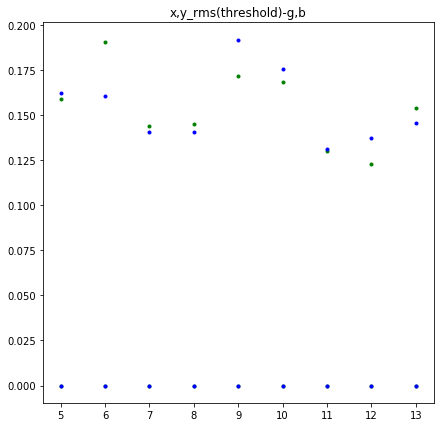

In [10]:
# ????????????????????????????????????????????????????
plt.figure(figsize = (7,7))
plt.plot(good['threshold'],good['x_rms'],'.g')
plt.plot(good['threshold'],good['y_rms'],'.b')
plt.title('x,y_rms(threshold)-g,b')
plt.show()

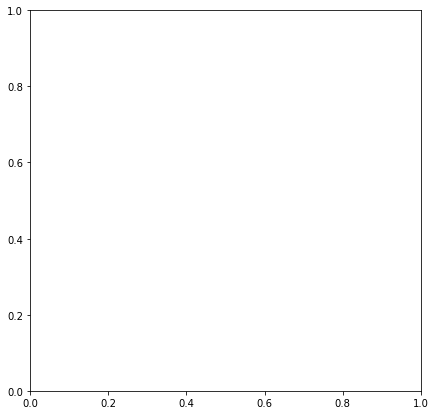

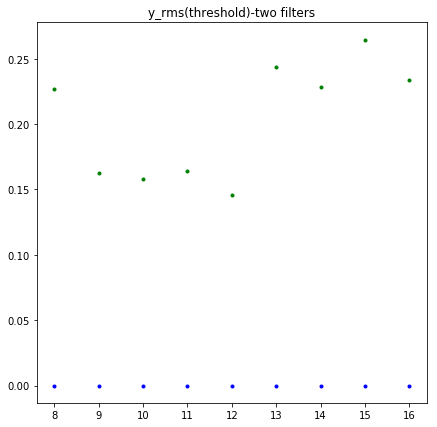

In [12]:
# plot figure for choosen sub-exp
plt.figure(figsize = (7,7))
plt.plot(good[good['file'] == 'u29r1r01t_c0m.fits']['threshold'],good[good['file'] == 'u29r1r01t_c0m.fits']['y_rms'],'.b')
plt.plot(good[good['file'] == 'u29r1r02t_c0m.fits']['threshold'],good[good['file'] == 'u29r1r02t_c0m.fits']['y_rms'],'.g')
plt.title('y_rms(threshold)-two filters')
plt.show()


In [24]:
# find min y_rms and min x_rms
min_x = good[good['x_rms'].values.astype(float) != 0.0]['x_rms'].min()
min_y = good[good['y_rms'].values.astype(float) != 0.0]['y_rms'].min()
print(min_x)
print(min_y)

0.206961
0.186928


In [18]:
# sort all values =! 0 and take lowest 5 in y_rms
good[good['x_rms'].values.astype(float) != 0.0].sort_values('x_rms',ascending=True)[:5]

,shift,file,x_rms,y_rms,threshold,conv_width
21,6shift.txt,u6ea5402m_c0m.fits,0.056897,0.037645,51,3
17,5shift.txt,u6ea5402m_c0m.fits,0.069021,0.038714,41,3
9,3shift.txt,u6ea5402m_c0m.fits,0.074321,0.078460,21,3
5,2shift.txt,u6ea5402m_c0m.fits,0.088635,0.088857,11,3
13,4shift.txt,u6ea5402m_c0m.fits,0.152657,0.101558,31,3


In [14]:
# sort all values =! 0 and take lowest 5 in y_rms BY FILTER??????????????????????
good['file' == 'u29r1r02t_c0m.fits'][['y_rms'].values.astype(float) != 0.0]].sort_values('y_rms',ascending=True)[:5]
#plt.plot(good[good['file'] == 'u6ea5402m_c0m.fits']['threshold'],good[good['file'] == 'u6ea5402m_c0m.fits']['y_rms'],'.b')


SyntaxError: invalid syntax (<ipython-input-14-aaeb809a2179>, line 2)

In [ ]:
############################################################ thresh=11, conv_width?

In [17]:
# tweak_run(path, n_up, threshold_ini, threshold_gap, conv_width_ini, conv_width_gap, 
# roundlo_val_ini, roundlo_gap, roundhi_val_ini, roundhi_gap, peakmax_val_ini, peakmax_gap):
test = tweak_run('/Users/natalie/anaconda2/envs/iraf27/iraf/sn/2000ds/2000ds_pre/tweak_814_2',10,11,0,3.5,0.1,-1,0,1,0,1000,0)

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 17:06:20.401 (12/12/2017)

Version Information

--------------------

Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:06:20.731 (12/12/2017)

     Found 587 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:06:21.081 (12/12/2017)

     Found 942 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:06:21.537 (12/12/2017)

     Found 985 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=

[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:06:34.134 (12/12/2017)

     Found 167 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:06:34.43 (12/12/2017)

     Found 383 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:06:34.867 (12/12/2017)

     Found 445 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 17:06:35.33 (12/12/2017)

     Found 442 objects.

===  Found a TOTAL of 1437 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fits


u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:06:46.670 (12/12/2017)

     Found 229 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:06:46.922 (12/12/2017)

     Found 471 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:06:47.448 (12/12/2017)

     Found 525 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 17:06:47.959 (12/12/2017)

     Found 515 objects.

===  Found a TOTAL of 1740 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 1) started at: 17:06:48.634 (12/12/2017)

     Found 227 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 2) started at: 17:06:48.86 (12/

In [18]:
# change to a jupyter table
dt=test.to_pandas()
dt.to_pickle('data.pickle')
good_table=pandas.read_pickle('data.pickle')

In [19]:
# take only unfailed sessions
good_conv = good_table[good_table['y_rms'] != 'failed']

In [20]:
good_conv

,shift,file,x_rms,y_rms,threshold,conv_width,roundlo,roundhi,peakmax
0,1shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,3.5,-1,1,1000
1,1shift.txt,u3m71609r_c0m.fits,0.130195,0.131338,11,3.5,-1,1,1000
2,2shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,3.6,-1,1,1000
3,2shift.txt,u3m71609r_c0m.fits,0.129812,0.120770,11,3.6,-1,1,1000
4,3shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,3.7,-1,1,1000
5,3shift.txt,u3m71609r_c0m.fits,0.132548,0.130722,11,3.7,-1,1,1000
6,4shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,3.8,-1,1,1000
7,4shift.txt,u3m71609r_c0m.fits,0.128029,0.120809,11,3.8,-1,1,1000
8,5shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,3.9,-1,1,1000
9,5shift.txt,u3m71609r_c0m.fits,0.117449,0.108848,11,3.9,-1,1,1000


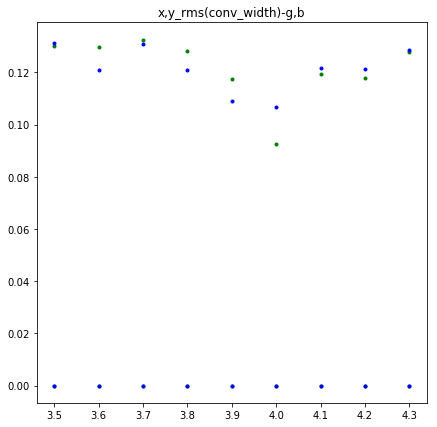

In [21]:
# plot figure for all sub-exp
plt.figure(figsize = (7,7))
plt.plot(good_conv['conv_width'],good_conv['x_rms'],'.g')
plt.plot(good_conv['conv_width'],good_conv['y_rms'],'.b')
plt.title('x,y_rms(conv_width)-g,b')
plt.show()

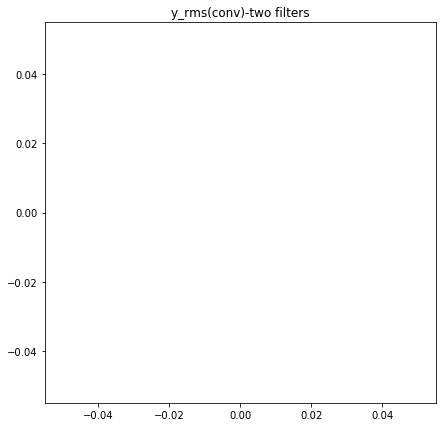

In [16]:
# plot figure for choosen sub-exp
plt.figure(figsize = (7,7))
plt.plot(good_conv[good_conv['file'] == 'u6ea5402m_c0m.fits']['conv_width'],good_conv[good_conv['file'] == 'u6ea5402m_c0m.fits']['y_rms'],'.b')
plt.plot(good_conv[good_conv['file'] == 'u6ea5403m_c0m.fits']['conv_width'],good_conv[good_conv['file'] == 'u6ea5403m_c0m.fits']['y_rms'],'.g')
plt.title('y_rms(conv)-two filters')
plt.show()

In [ ]:
#############################################thresh = 10, conv = 4.0, roundlo?

In [35]:
# tweak_run(path, n_up, threshold_ini, threshold_gap, conv_width_ini, conv_width_gap, 
# roundlo_val_ini, roundlo_gap, roundhi_val_ini, roundhi_gap, peakmax_val_ini, peakmax_gap):
test = tweak_run('/Users/natalie/anaconda2/envs/iraf27/iraf/sn/2000ds/2000ds_pre/tweak_814_2',10,11,0,4.0,0,-1.3,0.1,1,0,1000,0)

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 17:22:49.908 (12/12/2017)

Version Information

--------------------

Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:22:50.213 (12/12/2017)

     Found 225 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:22:50.469 (12/12/2017)

     Found 454 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:22:50.925 (12/12/2017)

     Found 553 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=

[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:23:02.261 (12/12/2017)

     Found 210 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:23:02.474 (12/12/2017)

     Found 432 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:23:02.863 (12/12/2017)

     Found 505 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 17:23:03.35 (12/12/2017)

     Found 496 objects.

===  Found a TOTAL of 1643 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fit


u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:23:14.645 (12/12/2017)

     Found 190 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:23:15.050 (12/12/2017)

     Found 391 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:23:15.783 (12/12/2017)

     Found 441 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 17:23:16.417 (12/12/2017)

     Found 430 objects.

===  Found a TOTAL of 1452 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 1) started at: 17:23:17.161 (12/12/2017)

     Found 189 objects.

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 2) started 

In [36]:
# change to a jupyter table
dt=test.to_pandas()
dt.to_pickle('data.pickle')
good_table=pandas.read_pickle('data.pickle')

In [37]:
# take only unfailed sessions
good_roundlo = good_table[good_table['y_rms'] != 'failed']

In [38]:
good_roundlo

,shift,file,x_rms,y_rms,threshold,conv_width,roundlo,roundhi,peakmax
0,1shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1.3,1,1000
1,1shift.txt,u3m71609r_c0m.fits,0.120984,0.119972,11,4.0,-1.3,1,1000
2,2shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1.2,1,1000
3,2shift.txt,u3m71609r_c0m.fits,0.120984,0.119972,11,4.0,-1.2,1,1000
4,3shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1.1,1,1000
5,3shift.txt,u3m71609r_c0m.fits,0.120984,0.119972,11,4.0,-1.1,1,1000
6,4shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1.0,1,1000
7,4shift.txt,u3m71609r_c0m.fits,0.092577,0.106648,11,4.0,-1.0,1,1000
8,5shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-0.9,1,1000
9,5shift.txt,u3m71609r_c0m.fits,0.092577,0.106648,11,4.0,-0.9,1,1000


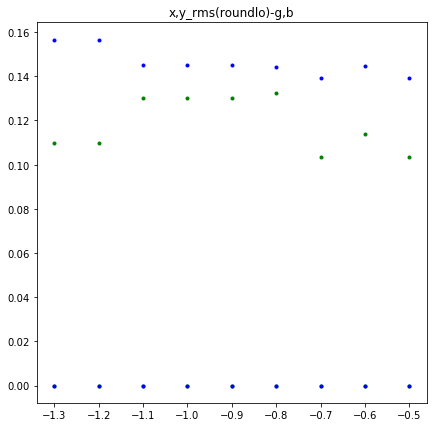

In [30]:
# plot figure for all sub-exp
plt.figure(figsize = (7,7))
plt.plot(good_roundlo['roundlo'],good_roundlo['x_rms'],'.g')
plt.plot(good_roundlo['roundlo'],good_roundlo['y_rms'],'.b')
plt.title('x,y_rms(roundlo)-g,b')
plt.show()

In [45]:
# plot figure for choosen sub-exp
plt.figure(figsize = (7,7))
plt.plot(good_round[good_round['file'] == 'u6ea5402m_c0m.fits']['roundlo'],good_round[good_round['file'] == 'u6ea5402m_c0m.fits']['y_rms'],'.b')
plt.plot(good_round[good_round['file'] == 'u6ea5403m_c0m.fits']['roundlo'],good_round[good_round['file'] == 'u6ea5403m_c0m.fits']['y_rms'],'.g')
plt.title('y_rms(roundlo)-two filters')
plt.show()

NameError: name 'good_round' is not defined

In [ ]:
#############################################thresh = 11, conv = 4.0, roundlo = -1, roundhi? 

In [39]:
# tweak_run(path, n_up, threshold_ini, threshold_gap, conv_width_ini, conv_width_gap, 
# roundlo_val_ini, roundlo_gap, roundhi_val_ini, roundhi_gap, peakmax_val_ini, peakmax_gap):
test = tweak_run('/Users/natalie/anaconda2/envs/iraf27/iraf/sn/2000ds/2000ds_pre/tweak_814_2',10,11,0,4.0,0,-1,0,0.5,0.1,1000,0)

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 17:24:14.966 (12/12/2017)

Version Information

--------------------

Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:24:15.328 (12/12/2017)

     Found 162 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:24:15.600 (12/12/2017)

     Found 335 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:24:16.031 (12/12/2017)

     Found 387 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=


Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:24:28.309 (12/12/2017)

     Found 198 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:24:28.529 (12/12/2017)

     Found 399 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:24:28.962 (12/12/2017)

     Found 472 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 17:24:29.457 (12/12/2017)

     Found 463 objects.

===  Found a TOTAL of 1532 objects in image 'u3m71608r_c0m.fits'



===  Sourc


astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:24:42.504 (12/12/2017)

     Found 213 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:24:42.749 (12/12/2017)

     Found 451 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:24:43.161 (12/12/2017)

     Found 525 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 17:24:43.658 (12/12/2017)

     Found 507 objects.

===  Found a TOTAL of 1696 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 1) started at: 17:24:44.365 (12/12/2017)

     Found 214 objects

In [40]:
# change to a jupyter table
dt=test.to_pandas()
dt.to_pickle('data.pickle')
good_table=pandas.read_pickle('data.pickle')

In [41]:
# take only unfailed sessions
good_roundhi = good_table[good_table['y_rms'] != 'failed']

In [42]:
good_roundhi

,shift,file,x_rms,y_rms,threshold,conv_width,roundlo,roundhi,peakmax
0,1shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,0.5,1000
1,1shift.txt,u3m71609r_c0m.fits,0.085496,0.107532,11,4.0,-1,0.5,1000
2,2shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,0.6,1000
3,2shift.txt,u3m71609r_c0m.fits,0.085496,0.107532,11,4.0,-1,0.6,1000
4,3shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,0.7,1000
5,3shift.txt,u3m71609r_c0m.fits,0.092577,0.106648,11,4.0,-1,0.7,1000
6,4shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,0.8,1000
7,4shift.txt,u3m71609r_c0m.fits,0.092577,0.106648,11,4.0,-1,0.8,1000
8,5shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,0.9,1000
9,5shift.txt,u3m71609r_c0m.fits,0.092577,0.106648,11,4.0,-1,0.9,1000


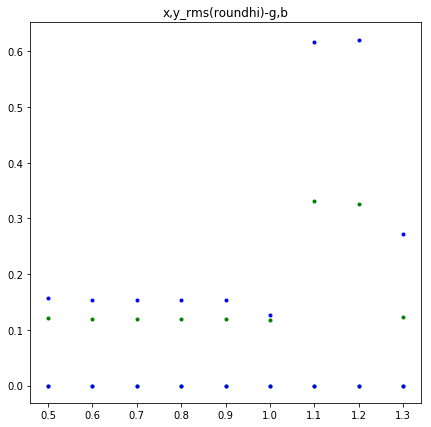

In [51]:
# plot figure for all sub-exp 
plt.figure(figsize = (7,7))
plt.plot(good_roundhi['roundhi'],good_roundhi['x_rms'],'.g')
plt.plot(good_roundhi['roundhi'],good_roundhi['y_rms'],'.b')
plt.title('x,y_rms(roundhi)-g,b')
plt.show()

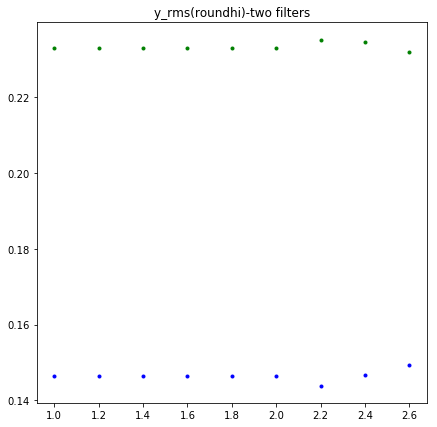

In [27]:
# plot figure for choosen sub-exp
plt.figure(figsize = (7,7))
plt.plot(good_round[good_round['file'] == 'u6ea5402m_c0m.fits']['roundhi'],good_round[good_round['file'] == 'u6ea5402m_c0m.fits']['y_rms'],'.b')
plt.plot(good_round[good_round['file'] == 'u6ea5403m_c0m.fits']['roundhi'],good_round[good_round['file'] == 'u6ea5403m_c0m.fits']['y_rms'],'.g')
plt.title('y_rms(roundhi)-two filters')
plt.show()

In [ ]:
#############################################thresh = 11, conv = 4 roundnlo = -1.0, rounfhi = 1, peakmax?

In [43]:
# tweak_run(path, n_up, threshold_ini, threshold_gap, conv_width_ini, conv_width_gap, 
# roundlo_val_ini, roundlo_gap, roundhi_val_ini, roundhi_gap, peakmax_val_ini, peakmax_gap):
test = tweak_run('/Users/natalie/anaconda2/envs/iraf27/iraf/sn/2000ds/2000ds_pre/test',10,11,0,4.0,0,-1,0,1,0,500,500)

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 17:25:38.94 (12/12/2017)

Version Information

--------------------

Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:25:39.339 (12/12/2017)

     Found 185 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:25:39.595 (12/12/2017)

     Found 416 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:25:40.095 (12/12/2017)

     Found 483 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=(


Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:25:53.772 (12/12/2017)

     Found 223 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:25:54.031 (12/12/2017)

     Found 438 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:25:54.507 (12/12/2017)

     Found 515 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 17:25:55.351 (12/12/2017)

     Found 504 objects.

===  Found a TOTAL of 1680 objects in image 'u3m71608r_c0m.fits'



===  Sourc


astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:26:08.106 (12/12/2017)

     Found 227 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:26:08.44 (12/12/2017)

     Found 441 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:26:09.348 (12/12/2017)

     Found 520 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 4) started at: 17:26:10.10 (12/12/2017)

     Found 505 objects.

===  Found a TOTAL of 1693 objects in image 'u3m71608r_c0m.fits'



===  Source finding for image 'u3m71609r_c0m.fits':

  #  Source finding for 'u3m71609r_c0m.fits', EXT=('SCI', 1) started at: 17:26:11.06 (12/12/2017)

     Found 224 objects.



In [44]:
# change to a jupyter table
dt=test.to_pandas()
dt.to_pickle('data.pickle')
good_table=pandas.read_pickle('data.pickle')

In [45]:
# take only unfailed sessions
good_peakmax = good_table[good_table['y_rms'] != 'failed']

In [46]:
good_peakmax

,shift,file,x_rms,y_rms,threshold,conv_width,roundlo,roundhi,peakmax
0,1shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,1,500
1,1shift.txt,u3m71609r_c0m.fits,0.124302,0.121937,11,4.0,-1,1,500
2,2shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,1,1000
3,2shift.txt,u3m71609r_c0m.fits,0.092577,0.106648,11,4.0,-1,1,1000
4,3shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,1,1500
5,3shift.txt,u3m71609r_c0m.fits,0.091832,0.106337,11,4.0,-1,1,1500
6,4shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,1,2000
7,4shift.txt,u3m71609r_c0m.fits,0.091207,0.105688,11,4.0,-1,1,2000
8,5shift.txt,u3m71608r_c0m.fits,0.000000,0.000000,11,4.0,-1,1,2500
9,5shift.txt,u3m71609r_c0m.fits,0.091207,0.105688,11,4.0,-1,1,2500


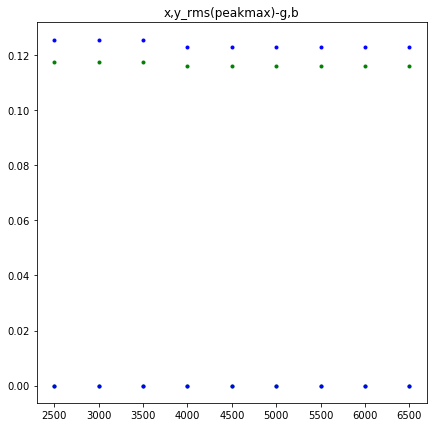

In [65]:
# plot figure for all sub-exp ??????????????????????????????????????????
plt.figure(figsize = (7,7))
plt.plot(good_peakmax['peakmax'],good_peakmax['x_rms'],'.g')
plt.plot(good_peakmax['peakmax'],good_peakmax['y_rms'],'.b')
plt.title('x,y_rms(peakmax)-g,b')
plt.show()

In [ ]:
################################## tweakreg run for good parameters without headers, see figures- 
# thresh = 11, conv = 4 roundnlo = -1, rounfhi = 1.0, peakmax = 2500

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 17:28:30.032 (12/12/2017)

Version Information

--------------------

Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:28:30.343 (12/12/2017)

     Found 226 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:28:30.612 (12/12/2017)

     Found 439 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:28:31.089 (12/12/2017)

     Found 516 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=

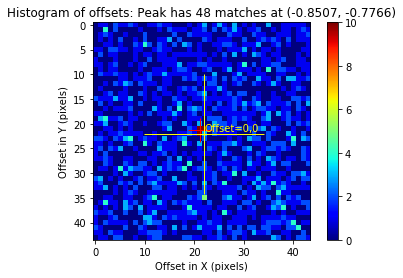

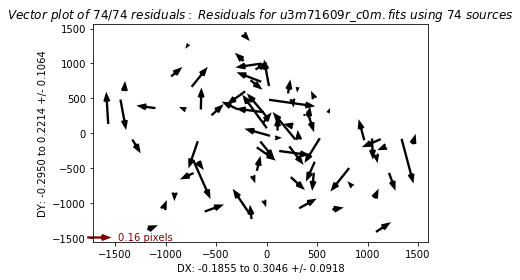

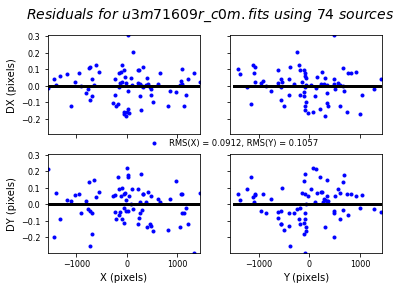

In [47]:
# final parameters to see plots
import os
from drizzlepac import tweakreg
os.chdir('/Users/natalie/anaconda2/envs/iraf27/iraf/sn/2000ds/2000ds_pre/tweak_814_2')
tweakreg.TweakReg('*c0m.fits', exclusions='WFPC2_exclude.txt', updatehdr=False, shiftfile=True, outshifts='shift_final', residplot='both', see2dplot='Yes', use_sharp_round='Yes', threshold=11, conv_width=4.0, roundlo=-1.0, roundhi=1.0, peakmax=2500)

Setting up logfile :  tweakreg.log

TweakReg Version 1.4.3(01-Jul-2016) started at: 17:30:04.702 (12/12/2017)

Version Information

--------------------

Python Version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08)
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

numpy Version -> 1.13.1 

astropy Version -> 2.0.2 

stwcs Version -> 1.3.2 

u6ea5403m_c0m.fits

u6ea5402m_c0m.fits

u6ea5404m_c0m.fits

u6ea5401m_c0m.fits


Finding shifts for: 

    u3m71608r_c0m.fits

    u3m71609r_c0m.fits

===  Source finding for image 'u3m71608r_c0m.fits':

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 1) started at: 17:30:05.154 (12/12/2017)

     Found 226 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 2) started at: 17:30:05.410 (12/12/2017)

     Found 439 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=('SCI', 3) started at: 17:30:05.852 (12/12/2017)

     Found 516 objects.

  #  Source finding for 'u3m71608r_c0m.fits', EXT=

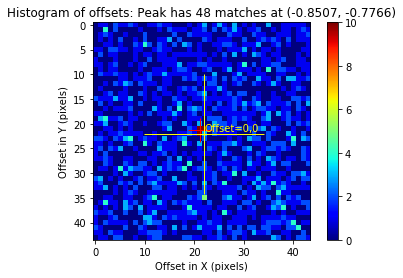

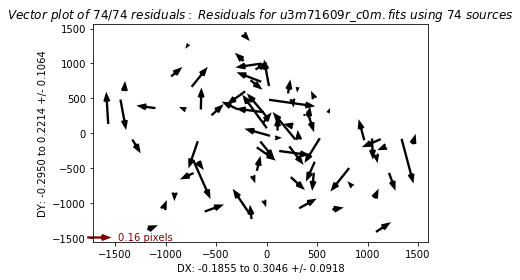

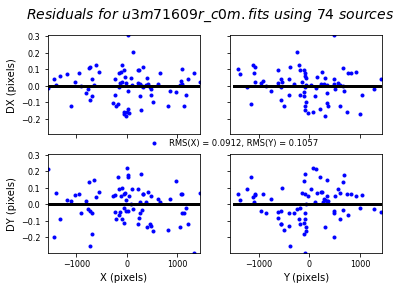

In [48]:
# final run with hdr update
import os
from drizzlepac import tweakreg
os.chdir('/Users/natalie/anaconda2/envs/iraf27/iraf/sn/2000ds/2000ds_pre/tweak_814_2')
tweakreg.TweakReg('*c0m.fits', exclusions='WFPC2_exclude.txt', updatehdr=True, shiftfile=True, outshifts='shift_final', residplot='both', see2dplot='Yes', use_sharp_round='Yes', threshold=11, conv_width=4.0, roundlo=-1.0, roundhi=1.0, peakmax=2500)

In [49]:
# tweaked checks
from astropy.io import fits
tw=fits.open('/Users/natalie/anaconda2/envs/iraf27/iraf/sn/2000ds/2000ds_pre/tweak_814_2/u3m71609r_c0m.fits')

In [50]:
tw[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  800 / Axis length                                    
NAXIS2  =                  800 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'SCI     '           / Extension name                                 
EXTVER  =                    1 / Extension version                              
INHERIT =                    T / Inherits global header                         
DATE    = '2008-12-25T18:24:36' / Date FITS file was generated                  
IRAF-TLM= '18:24:39 (25/12/2

In [51]:
tw[1].header['WCSNAME']

'TWEAK'

In [54]:
!more shift_final

# frame: output
# refimage: shifts_wcs.fits[wcs]
# form: delta
# units: pixels
u3m71608r_c0m.fits    0.000000  0.000000    0.000000     1.000000   0.000000  0. 000000
u3m71609r_c0m.fits    -0.002060  -0.062201    0.000968     1.000015   0.091207   0.105688
>

In [60]:
shift = open('shift_final',"r")     # open the shift file and read parameters
list = []
for line in shift:
    list.append(line)
shift.close()

In [61]:
list

['# frame: output\n',
 '# refimage: shifts_wcs.fits[wcs]\n',
 '# form: delta\n',
 '# units: pixels\n',
 'u3m71608r_c0m.fits    0.000000  0.000000    0.000000     1.000000   0.000000  0.000000\n',
 'u3m71609r_c0m.fits    -0.002060  -0.062201    0.000968     1.000015   0.091207  0.105688\n']

In [62]:
list[4]

'u3m71608r_c0m.fits    0.000000  0.000000    0.000000     1.000000   0.000000  0.000000\n'

In [63]:
for d in range(4, len(list), 1):    # insert 
    words = list[d].split()

In [64]:
words

['u3m71609r_c0m.fits',
 '-0.002060',
 '-0.062201',
 '0.000968',
 '1.000015',
 '0.091207',
 '0.105688']

In [66]:
words[0]

'u3m71609r_c0m.fits'